In [1]:
# Mount Drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/Shareddrives/CAPSTONE C23-PS061/Dataset Split'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']

Contents of validation directory:
['Kardus', 'Kaca (White & Green)', 'Plastik', 'Kertas', 'Logam', 'Organik', 'Botol Plastik', 'Botol Kaca']


In [1]:
# RUN LOCAL ENVIRONTMENT
import os
base_dir = 'C:/Users/Zakaria/Bangkit/Dataset Split'

In [2]:
# Import train_dir & validation_dir
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'

# Print the number of files in each class for train and validation
print("Number of files in each class (train):")
for class_folder in os.listdir(train_dir):
    class_folder_path = os.path.join(train_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")

print("\nNumber of files in each class (validation):")
for class_folder in os.listdir(validation_dir):
    class_folder_path = os.path.join(validation_dir, class_folder)
    num_files = len(os.listdir(class_folder_path))
    print(f"{class_folder}: {num_files} files")


Number of files in each class (train):
Botol Kaca: 698 files
Botol Plastik: 700 files
Kaca (White _ Green): 560 files
Kardus: 623 files
Kertas: 751 files
Logam: 538 files
Organik: 696 files
Plastik: 691 files

Number of files in each class (validation):
Botol Kaca: 300 files
Botol Plastik: 300 files
Kaca (White _ Green): 241 files
Kardus: 268 files
Kertas: 322 files
Logam: 231 files
Organik: 299 files
Plastik: 304 files


In [3]:
import tensorflow as tf

# Menentukan dimensi gambar dan jumlah kelas
image_width = 300
image_height = 300
num_classes = 8

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pra-pemrosesan dan augmentasi gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,  # Skala ulang intensitas pixel menjadi rentang 0-1
                                   rotation_range=20,  # Rotasi acak gambar dalam rentang 0-20 derajat
                                   #width_shift_range=0.2,  # Pergeseran horizontal acak pada gambar
                                   #height_shift_range=0.2,  # Pergeseran vertikal acak pada gambar
                                   horizontal_flip=True,  # Flip horizontal acak pada gambar
                                   )  

validation_datagen = ImageDataGenerator(rescale=1./255)  # Skala ulang intensitas pixel gambar validasi

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data latihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data validasi
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 5257 images belonging to 8 classes.
Found 2265 images belonging to 8 classes.


In [5]:
# Membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               174621184 
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

In [6]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Melatih model menggunakan data latihan dan validasi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/10
164/164 [==============================] - 731s 4s/step - loss: 3.7180 - accuracy: 0.3941 - val_loss: 1.2899 - val_accuracy: 0.5487
Epoch 2/10
164/164 [==============================] - 609s 4s/step - loss: 1.2565 - accuracy: 0.5657 - val_loss: 1.1762 - val_accuracy: 0.5665
Epoch 3/10
164/164 [==============================] - 438s 3s/step - loss: 1.0598 - accuracy: 0.6331 - val_loss: 1.0355 - val_accuracy: 0.6406
Epoch 4/10
164/164 [==============================] - 1846s 11s/step - loss: 0.9533 - accuracy: 0.6718 - val_loss: 1.0582 - val_accuracy: 0.6545
Epoch 5/10
164/164 [==============================] - 402s 2s/step - loss: 0.8495 - accuracy: 0.7079 - val_loss: 0.9453 - val_accuracy: 0.7040
Epoch 6/10
164/164 [==============================] - 427s 3s/step - loss: 0.7495 - accuracy: 0.7445 - val_loss: 0.9733 - val_accuracy: 0.6835
Epoch 7/10
164/164 [==============================] - 453s 3s/step - loss: 0.6669 - accuracy: 0.7694 - val_loss: 0.9262 - val_accuracy: 0.71

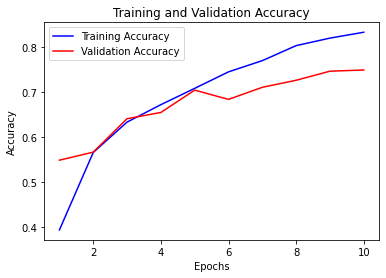

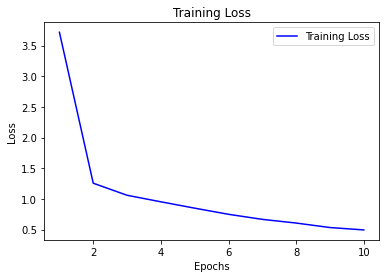

In [8]:
import matplotlib.pyplot as plt

# Mengambil nilai akurasi dan loss dari objek history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']

# Menghitung jumlah epoch
epochs = range(1, len(accuracy) + 1)

# Plot akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss training
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
# Menyimpan model UBAH JUDUL JANGAN LUPA : ) RUN ON LOCAL
model.save('C:/Users/Zakaria/Bangkit/Model/model2xConvolutionalWithAugmentasi.h5')

In [ ]:
# Menyimpan model UBAH JUDUL JANGAN LUPA : )
model.save('/content/drive/Shareddrives/CAPSTONE C23-PS061/Model/model2xConvolutionalWithAugmentasi.h5')